Pima indian dataseti uzerinden diyabet icin makine ogrenmesi algoritmalari kullanilarak diyabetin tahmin edilmesi amaclanmistir.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [12]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=column_names)
print(data)

columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_to_replace:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].mean(), inplace=True)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Multinomial Naive Bayes Classifier
Confusion Matrix:
[[114  37]
 [ 43  37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       151
           1       0.50      0.46      0.48        80

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.65      0.65      0.65       231

AUC Value: 0.65


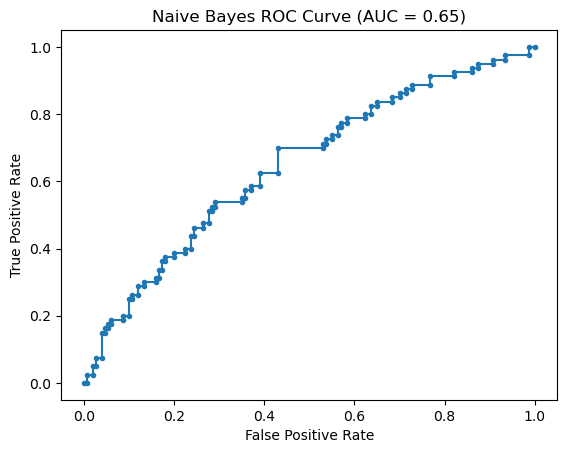

In [23]:


nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)
y_tahmin = nb_model.predict(X_test)
y_olasilik = nb_model.predict_proba(X_test)[:, 1]

print("Multinomial Naive Bayes Classifier")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_tahmin))
print("Classification Report:")
print(classification_report(y_test, y_tahmin))

fpr, tpr, _ = roc_curve(y_test, y_olasilik)
auc_value = roc_auc_score(y_test, y_olasilik)
print(f"AUC Value: {auc_value:.2f}")

plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_value:.2f}')
plt.title('Naive Bayes ROC Curve (AUC = {:.2f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Naive Bayes sınıflandırıcısının performansını değerlendirdiğimizde, doğruluk oranının %65 olduğunu görüyoruz. Konfüzyon matrisi, modelin negatif sınıfları (0) daha iyi tanıdığını (TN=114, FP=37) ve pozitif sınıfları (1) tanımada daha zorlandığını (FN=43, TP=37) gösteriyor. Sınıflandırma raporunda, 0 sınıfı için precision %73, recall %75 iken, 1 sınıfı için precision %50, recall %46 olarak karşımıza çıkıyor, bu da modelin 1 sınıfını tanımada düşük performans sergilediğini gösteriyor. ROC eğrisi altındaki alan (AUC) 0.65 olup, modelin pozitif sınıfları ayırt etme yeteneğinin orta seviyede olduğunu işaret ediyor. Genel olarak, modelin negatif sınıfları daha iyi tanıdığı, ancak pozitif sınıfları tanımada geliştirilmesi gerektiği anlaşılıyor.

Auc: 0.7615066225165563
KNN raporu
En iyi k degeri: 17
Confusion Matrix:
[[125  26]
 [ 33  47]]
Klasifikasyon raporu:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



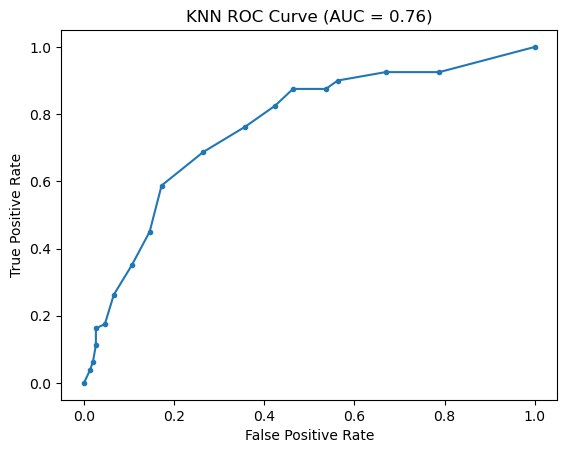

In [18]:
param_grid = {'n_neighbors': range(1, 21)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

auc_knn = roc_auc_score(y_test, y_prob_knn)
print("Auc:",auc_knn)
print("KNN raporu")
print("En iyi k degeri:", best_k)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Klasifikasyon raporu:")
print(classification_report(y_test, y_pred_knn))

fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.title('KNN ROC Curve (AUC = {:.2f})'.format(auc_knn))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Doğru negatif değerler 125 dir false negatifler ise 33, bu durum negatif degerleri yüksek oranda tahmin edebildiğimizi gösterir. Doğru pozitifler 47 iken yanlış pozitifler ise 26 dır. Doğru değerler negatif degerler kadar iyi bir dogruluk oranıyla tahmin edilememiştir. Sınıf 0 için kesinlik değeri 0.79, sınıf 1 için ise 0.64 olarak hesaplanmış. Bu, sınıf 0 için yapılan tahminlerin %79’unun doğru olduğunu, sınıf 1 için yapılan tahminlerin ise %64’ünün doğru olduğunu gösteriyor.Sınıf 0 için duyarlılık değeri 0.83, sınıf 1 için ise 0.59 olarak hesaplanmış. Bu, sınıf 0 için gerçek pozitiflerin %83’ünün doğru tahmin edildiğini, sınıf 1 için gerçek pozitiflerin ise %59’unun doğru tahmin edildiğini gösteriyor. F1-score, precision ve recall değerlerinin harmonik ortalamasıdır. Sınıf 0 için F1-score 0.81 olarak hesaplanmış.0.76 lık auc degeri ve gorunen roc egrisi ise modelin performansının genel olarak iyi oldugunu gosteriyor.

SVM Sonucları
Konfüsyon matrisi:
[[130  21]
 [ 42  38]]
Klasifikasyon raporu:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       151
           1       0.64      0.47      0.55        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231

AUC Value: 0.77


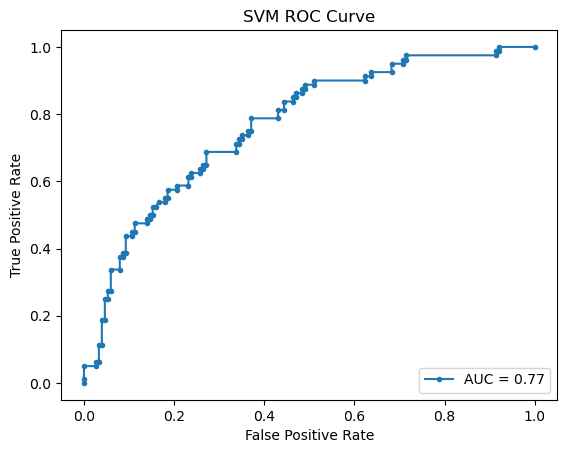

In [19]:


svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

svm_tahmin = svm_model.predict(X_test)
svm_olasilik= svm_model.predict_proba(X_test)[:, 1]

print("SVM Sonucları")
print("Konfüsyon matrisi:")
print(confusion_matrix(y_test, svm_tahmin))
print("Klasifikasyon raporu:")
print(classification_report(y_test, svm_tahmin))

# ROC Curve and AUC value
fpr, tpr, _ = roc_curve(y_test, svm_olasilik)
auc_value = roc_auc_score(y_test, svm_olasilik)
print(f"AUC Value: {auc_value:.2f}")

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_value:.2f}')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Doğru negatif değerler 130 dur false negatifler ise 42, bu durum negatif degerleri yüksek oranda tahmin edebildiğimizi gösterir. Doğru pozitifler 28 iken yanlış pozitifler ise 21 dir. Doğru değerler negatif degerler kadar iyi bir dogruluk oranıyla tahmin edilememiştir. Sınıf 0 için kesinlik değeri 0.76, sınıf 1 için ise 0.64 olarak hesaplanmış. Bu, sınıf 0 için yapılan tahminlerin %76’sının doğru olduğunu, sınıf 1 için yapılan tahminlerin ise %64’ünün doğru olduğunu gösteriyor.Sınıf 0 için duyarlılık değeri 0.86, sınıf 1 için ise 0.47 olarak hesaplanmış. Bu, sınıf 0 için gerçek pozitiflerin %86’sının doğru tahmin edildiğini, sınıf 1 için gerçek pozitiflerin ise %47’sinin doğru tahmin edildiğini gösteriyor. F1-score, precision ve recall değerlerinin harmonik ortalamasıdır. Sınıf 0 için F1-score 0.80 olarak hesaplanmış.Sınıf 1 için ise 0.55 dir.0.77 lık auc degeri ve gorunen roc egrisi ise modelin performansının genel olarak iyi oldugunu gosteriyor.

MLP raporu
Konfüzyon Matrisi:
[[123  28]
 [ 35  45]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.56      0.59        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231

AUC Değeri: 0.72


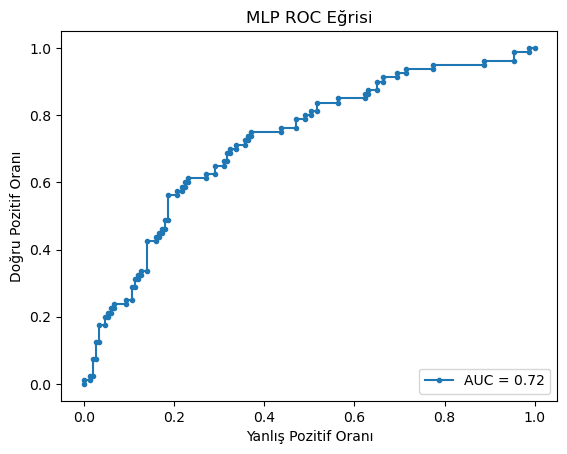

In [22]:
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_tahmin = mlp_model.predict(X_test)
y_olasilik = mlp_model.predict_proba(X_test)[:, 1]

print("MLP raporu")
print("Konfüzyon Matrisi:")
print(confusion_matrix(y_test, y_tahmin))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_tahmin))

fpr, tpr, _ = roc_curve(y_test, y_olasilik)
auc_value = roc_auc_score(y_test, y_olasilik)
print(f"AUC Değeri: {auc_value:.2f}")

plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_value:.2f}')
plt.title('MLP ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.show()

Doğru negatif değerler 123 dur false negatifler ise 35, bu durum negatif degerleri yüksek oranda tahmin edebildiğimizi gösterir. Doğru pozitifler 45 iken yanlış pozitifler ise 28 dir. Doğru değerler negatif degerler kadar iyi bir dogruluk oranıyla tahmin edilememiştir. Sınıf 0 için kesinlik değeri 0.78, sınıf 1 için ise 0.62 olarak hesaplanmış. Bu, sınıf 0 için yapılan tahminlerin %76’sının doğru olduğunu, sınıf 1 için yapılan tahminlerin ise %62’ünün doğru olduğunu gösteriyor.Sınıf 0 için duyarlılık değeri 0.81, sınıf 1 için ise 0.56 olarak hesaplanmış. Bu, sınıf 0 için gerçek pozitiflerin %81’sının doğru tahmin edildiğini, sınıf 1 için gerçek pozitiflerin ise %56’sinin doğru tahmin edildiğini gösteriyor. F1-score, precision ve recall değerlerinin harmonik ortalamasıdır. Sınıf 0 için F1-score 0.80 olarak hesaplanmış.Sınıf 1 için ise 0.59 dir.0.72 lık auc degeri ve gorunen roc egrisi ise modelin performansının gorece iyi oldugunu gosteriyor.

Doğruluk Oranı: KNN algoritması %74'lük en yüksek doğruluk oranıyla öne çıktı, ardından SVM %73'lük bir oranla geldi. Bu iki algoritma, Multinomial Naive Bayes Sınıflandırıcı ve MLP'yi geride bırakarak daha yüksek performans sergiledi.
Öneme Dayanan Doğruluk: Her iki sınıf için de en yüksek öneme dayalı doğruluk oranına sahip olan KNN, gereksiz pozitif sınıflandırmaları azaltma konusunda etkili oldu.
Anlama Oranı: Sınıf 0 için en yüksek anlama oranına sahip olan SVM, bu sınıf içindeki gerçek pozitiflerin daha büyük bir kısmını yakaladığını gösterdi.
F1 Skoru: KNN ve SVM'nin benzer F1 skorlarına sahip olması, hassasiyet ve anlama oranları arasında dengeli bir performans sağladığını gösteriyor. Bu iki algoritma, Multinomial Naive Bayes Sınıflandırıcı ve MLP'den daha yüksek F1 skorlarına sahiptirler.
AUC Değer: SVM, %0.77 AUC değeri ile diğer algoritmaların üzerine çıktıysa da, farklı sınıfları ayırt etme kapasitesi açısından en iyi performansı sergiledi.


#### Sınıflandırma Performansı:

| Sınıflandırıcı  | Doğruluk | Precision (Sınıf 0) | Precision (Sınıf 1) | Recall (Sınıf 0) | Recall (Sınıf 1) | F1-Score (Sınıf 0) | F1-Score (Sınıf 1) |
|-----------------|----------|----------------------|----------------------|------------------|------------------|--------------------|--------------------|
| Naive Bayes     | 0.65     | 0.73                 | 0.50                 | 0.75             | 0.46             | 0.74               | 0.48               |
| K-NN            | 0.74     | 0.79                 | 0.64                 | 0.83             | 0.59             | 0.81               | 0.61               |
| MLP             | 0.72     | 0.78                 | 0.62                 | 0.81             | 0.56             | 0.80               | 0.59               |
| SVM             | 0.72     | 0.76                 | 0.64                 | 0.86             | 0.47             | 0.80               | 0.55               |

#### AUC Değerleri:

| Sınıflandırıcı  | AUC Değeri |
|-----------------|------------|
| Naive Bayes     | 0.65       |
| K-NN            | 0.76       |
| MLP             | 0.72       |
| SVM             | 0.77       |